# Module 21 Final Assignment: Implementing the K-Means Algorithm and Reinforcement Learning Algorithm


## Learning Outcomes Addressed:
<li>2. Implement k-means using Scikit-learn.</li>
<li>5. Implement the Quality matrix and the Bellman equation.</li>
<li>6. Implement the fundamental steps of reinforcement learning.</li>

## Assignment Overview

In the first part of this assignment, you will be implementing the k-means classification algorithm on the Titanic dataset to try to predict if a passenger survived or not. In the second part of the assignment, you will be implementing a reinforcement learning algorithm to help a robot navigate in several rooms.

## Part 1: K-Means Algorithm

### The Titanic Dataset

The Titanic was a British passenger liner which sank in the North Atlantic Ocean on April 15, 1912 after striking an iceberg during her maiden voyage from Southampton, UK to New York City. You will be using a dataset for this part of the assignment that has demographic information about each passenger and indicates whether or not the passenger survived the disaster:

<li>PassengerId: Unique Id of passenger</li>
<li>Survived: If the passenger survived (0-No, 1-Yes)</li>
<li>Pclass: Passenger Class (1=1st, 2=2nd, 3=3rd)</li>
<li>Name: Name of the passenger</li>
<li>Sex: Male/Female</li>
<li>Age: Passenger age in years</li>
<li>SibSp: Number of siblings/spouses aboard</li>
<li>Parch: Number of parents/children aboard</li>
<li>Ticket: Ticket Number</li>
<li>Fare: Passenger Fare</li>
<li>Cabin: Passenger Fare</li>
<li>Embarked: Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)</li>

Reference

Kaggle Inc. “Titanic - Machine Learning from Disaster.” Kaggle. 2022. https://www.kaggle.com/c/titanic. 

To start the assignment, create a folder called `data` and download the two CSV data files: test.csv and train.csv.

## Question 1

Using pandas, complete the code in the cell below to load the data from the CSV files into the `train_df` and `test_df` *dataframes*.

In [1]:
#Question 1:

import pandas as pd
import numpy as np

train_df = pd.read_csv(r"C:\Users\markg\Data Engineering\Module21\Final\data\train.csv")
test_df = pd.read_csv(r"C:\Users\markg\Data Engineering\Module21\Final\data\test.csv")

## Question 2

Explore the `train_df` and `test_df` *dataframes*.  

* a) Display the first 10 rows of the `train_df` *dataframe*.
* b) Display the first 10 rows of the `test_df` *dataframe*.
* c) Use the `describe` *function* to calculate basic statistics (mean, median, and mode) for the `train_df` *dataframe*.
* d) Use the `describe` *function* to calculate basic statistics (mean, median, and mode) for the `test_df` *dataframe*.

In [2]:
#Question 2a:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Question 2b: 
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [4]:
#Question 2c: 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Question 2d: 
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.366029
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.482295
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


## Question 3

Now you need to do some exploratory data analysis. The first step is to inspect the datasets and look for any missing values. The pandas *dataframe* has a *function* called `isna()` that returns TRUE (1) or FALSE (0) depending on whether the column has missing data or not.

* a) Find out how many values are missing for each column in the `train_df` *dataframe*.
* b) Find out how many values are missing for each column in the `test_df` *dataframe*.

Hint: You can sum all the values returned by the `isna()` *function* to get a count of all the missing values using the following code: `<dataframe>.isna().sum()`

In [6]:
#Question 3a: 
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Question 3b: 
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

## Question 4

You don't want to have rows with empty values and you also don't want to discard them, so you will be imputing numeric columns with the data that is missing. Imputing means to assign a value to something by inference. You will be using the average value of the columns with missing data to fill out the empty values.

* a) Fill in the missing values of numeric data with the mean for the `train_df` *dataframe*. Verify that numeric columns don't have missing values.
* b) Fill in the missing values of numeric data with the mean for the `test_df` *dataframe*. Verify that numeric columns don't have missing values.

Hint: See the following *method*: `<dataframe>.fillna(<dataframe>.mean(), inplace=True)`

In [8]:
#Question 4a:
numeric_cols = train_df.select_dtypes(include=['number']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Question 4b:
test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].mean())
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

## Question 5

Next, you need to drop columns that are not relevant to your model from your *dataframes*.

* a) Drop the `Name`, `Ticket`, `Cabin`, `Embarked` columns from the `train_df` *dataframe*.
* b) Drop the `Name`, `Ticket`, `Cabin`, `Embarked` columns from the `test_df` *dataframe*.

In [10]:
drop_column_list = ['Name', 'Ticket', 'Cabin', 'Embarked']

In [11]:
#Question 5a: 
train_df.drop(columns=drop_column_list, inplace=True)

In [12]:
#Question 5b: 
test_df.drop(columns=drop_column_list, inplace=True)

## Question 6

The `Sex` column is not numeric, but it has the distinct values of `male` and `female`. The code below uses the `LabelEncoder`  *function* from Scikit-learn to encode the `Sex` column into a numeric column:

In [13]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(train_df['Sex'])
## 0 if female - 1 is male - see labelEncoder.classes_
train_df['Sex'] = labelEncoder.transform(train_df['Sex'])

Now, encode the `Sex` column in the `test_df` *dataframe*:

In [14]:
#Question 6: 
labelEncoder = LabelEncoder()
labelEncoder.fit(test_df['Sex'])
## 0 if female - 1 is male - see labelEncoder.classes_
test_df['Sex'] = labelEncoder.transform(test_df['Sex'])

## Question 7

Your data is almost ready for modeling. Create the following *arrays* to prepare your data for modeling:

* a) Create a NumPy *array* with all the values from the `train_df` *dataframe* except for the `Survived` column and call it `X_train`.
* b) Create a NumPy *array* with all the values from the `test_df` *dataframe* except for the `Survived` column and call it `X_test`.
* c) Create a NumPy *array* with only the `Survived` column from the `train_df` *dataframe* and call it `y_train`.
* d) Create a NumPy *array* with only the `Survived` column from the `test_df` *dataframe* and call it `y_test`.

In [15]:
#Question 7a: 

X_train = train_df.drop(columns=['Survived']).to_numpy()

In [16]:
#Question 7b: 

X_test = test_df.drop(columns=['Survived']).to_numpy()

In [17]:
#Question 7c: 

y_train = train_df['Survived'].to_numpy()

In [18]:
#Question 7d: 

y_test = test_df['Survived'].to_numpy()
print(type(y_test))

<class 'numpy.ndarray'>


## Question 8

Now you will build the k-means model. Determine how many *clusters* you think you should use for this problem. Modify the code below with the correct number of *clusters* for your model.


In [19]:
#Question 8: 

from sklearn.cluster import KMeans

number_of_clusters = 2
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(X_train)


C:\Users\markg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\markg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

## Question 9

Next, feed your model the unseen `X_test` data and determine how well the model does in predicting if a passenger survived or not. Assign the values returned by the model to `y_pred`. Complete the code below to feed the `X_test` data to the model. Assign the value to `y_pred`.

Hint: Call the following *function*: `kmeans.predict(<nparray>).`

In [20]:
#Question 9:

y_pred = kmeans.predict(X_test)

## Question 10

How well does your model predict if a passenger survived when you feed the unseen `X_test` data to the model? Complete the code below to compute how well your model predicts passenger survival based on the `X_test` data:

In [21]:
#Question 10:

correct = 0
for i in  range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += 1
        
print(correct/len(X_test))

0.3660287081339713


## Question 11

Research the k-means algorithm and see if you can adjust the parameters passed to the model so that you can obtain better precision. Are there any other modifications you can make to the data or to the model to improve performance? 

Question 11a: Make improvements to the k-means algorithm to obtain better precision and improve performance and show your work in the Markdown cell below.

Question 11b. Describe the improvements you made to the model in the Markdown cell below. This is an open-ended question and requires a written response.

In [22]:
#Question 11a:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, max_iter=10000)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

correct = 0
for i in  range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += 1
        
print(correct/len(X_test))


0.6339712918660287


C:\Users\markg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\markg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


#Question 11b: 

I increased the number of iterations the algorithm would go through to 10,000 but the precision was not increased.
Women and children were allowed on lifeboats first when the Titanic was evacuated.
Altering the dataset or altering the algorithm so that woman and children result in a reward and men result in a penalty might increase the accuracy of prediciton.

## Part 2: Reinforcement Learning Algorithm

For this part of the assignment, you need to teach a robot to navigate a building that contains 15 rooms. The figure below shows the layout of the rooms in the building.

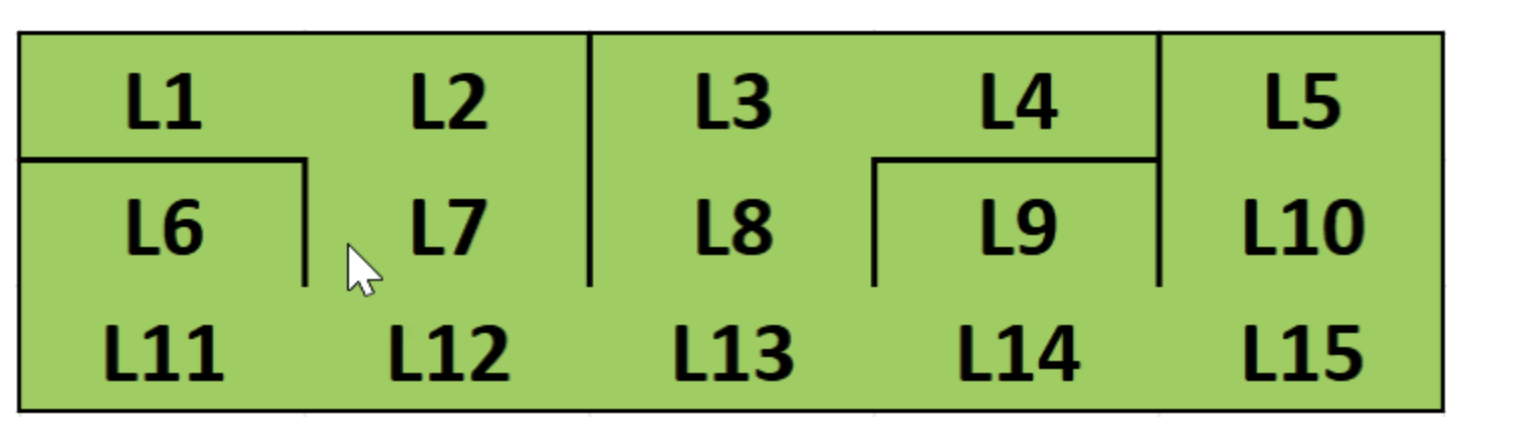

## Question 12

Create a rewards matrix to capture the layout of the rooms. Store the rewards matrix in a variable titled `rewards`.

In [23]:
#Question 12:

rewards = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1],
[0,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
[0,0,0,0,0,0,1,0,0,0,1,0,1,0,0],
[0,0,0,0,0,0,0,1,0,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,1,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0]]

## Question 13

The `actions` *list* below contains a numeric representation of all 15 rooms in the building. Define the `actions` *list* that contains all of the numbers from 1 to 15.

In [24]:
#Question 13: 

actions = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

## Question 14

The `location_to_state` *dictionary* maps a location to a state. Write code to create a *dictionary* with data formatted for `state_to_location` based on the information in the `location_to_state` *dictionary*.

In [25]:
location_to_state = {
    'L1': 0,
    'L2': 1,
    'L3': 2,
    'L4': 3,
    'L5': 4,
    'L6': 5,
    'L7': 6,
    'L8': 7,
    'L9': 8,
    'L10': 9,
    'L11': 10,
    'L12': 11,
    'L13': 12,
    'L14': 13,
    'L15': 14,
}

location_to_state

{'L1': 0,
 'L2': 1,
 'L3': 2,
 'L4': 3,
 'L5': 4,
 'L6': 5,
 'L7': 6,
 'L8': 7,
 'L9': 8,
 'L10': 9,
 'L11': 10,
 'L12': 11,
 'L13': 12,
 'L14': 13,
 'L15': 14}

In [26]:
#Question 14: 

state_to_location = dict((state,location) for location,state in location_to_state.items())

state_to_location

{0: 'L1',
 1: 'L2',
 2: 'L3',
 3: 'L4',
 4: 'L5',
 5: 'L6',
 6: 'L7',
 7: 'L8',
 8: 'L9',
 9: 'L10',
 10: 'L11',
 11: 'L12',
 12: 'L13',
 13: 'L14',
 14: 'L15'}

## Implementing the Bellman Equation

For the final question in this assignment, you will be implementing the Bellman equation to help a robot navigate an optimal path through a building. You will begin by initializing the parameters needed for the equation. Then, you will proceed through the code cell below to run the Bellman equation.

Once you complete this, you will be asked to evaluate your results with a few questions.

In [27]:
# Initializing Parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 

In [28]:
def get_optimal_route(start_location,end_location):
    # Copy the rewards matrix to new matrix.
    rewards_new = np.copy(rewards)
    
    # Get the ending state to correspond to the ending location as given.
    ending_state = location_to_state[end_location]
    
    # Using the above information, automatically set the priority of the given ending 
    # state to the highest one.
    rewards_new[ending_state,ending_state] = 999

    # -----------Q-Learning algorithm-----------
   
    # Initializing Q-Values
    Q = np.array(np.zeros([15,15]))

    # Q-Learning process
    for i in range(1000):
        # Select a state randomly.
        current_state = np.random.randint(0,15) # Python excludes the upper bound
        # Use this function to traverse through the neighbor locations in the maze.
        playable_actions = []
        # Iterate through the new rewards matrix and get the actions > 0.
        for j in range(15):
            if rewards_new[current_state,j] > 0:
                playable_actions.append(j)
        # Pick an action randomly from the list of playable actions  
        # leading to the next state.
        next_state = np.random.choice(playable_actions)
        # Compute the temporal difference.
        # The action here specifically refers to going to the next state.
        TD = rewards_new[current_state,next_state] + gamma * Q[next_state,np.argmax(Q[next_state,])] - Q[current_state,next_state]
        # Update the Q-value using the Bellman equation.
        Q[current_state,next_state] += alpha * TD
        

 # Initialize the optimal route with the starting location.
    route = [start_location]
    # You do not know about the next location yet, so initialize with the value of 
    # the starting location
    next_location = start_location
    
    # You don't know the exact number of iterations
    # needed to reach to the final location, so the while loop will be a good choice 
    # for iterating.
    
    while(next_location != end_location):
        # Fetch the starting state.
        starting_state = location_to_state[start_location]
        
        # Fetch the highest Q-value pertaining to the starting state.
        next_state = np.argmax(Q[starting_state,])
        
        # You obtained the index of the next state, but you need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        
        # Update the starting location for the next iteration.
        start_location = next_location
    print(Q)
    return route

## Question 15

Finally, you will run the reinforcement learning algorithm to determine the following information:

* a) Find the optimal path from room L1 to L15.
* b) Find the optimal path from room L9 to L1.
* c) Find the optimal path from room L6 to L1.

In [29]:
#Question 15a: find the optimal route from room L1 to L15
np.set_printoptions(precision=0)
print(get_optimal_route('L1', 'L15'))

[[   0.  713.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [ 535.    0.    0.    0.    0.    0.  949.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.  712.    0.    0.    0. 1262.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.  948.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. 2247.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  949.    0.
     0.    0.    0.]
 [   0.  713.    0.    0.    0.    0.    0.    0.    0.    0.    0. 1264.
     0.    0.    0.]
 [   0.    0.  948.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1684.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0. 2245.    0.]
 [   0.    0.    0.    0. 1685.    0.    0.    0.    0.    0.    0.    0.
     0.    0. 2995.]
 [   0.    0.    0.    0.    0.  713.    0.    0. 

In [30]:
#Question 15b: find the optimal route from room L9 to L1
np.set_printoptions(precision=0)
print(get_optimal_route('L9', 'L1'))

[[3996. 2249.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [2998.    0.    0.    0.    0.    0. 1688.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.  403.    0.    0.    0.  714.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.  537.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.  403.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  951.    0.
     0.    0.    0.]
 [   0. 2249.    0.    0.    0.    0.    0.    0.    0.    0.    0. 1267.
     0.    0.    0.]
 [   0.    0.  537.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   951.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.  714.    0.]
 [   0.    0.    0.    0.  303.    0.    0.    0.    0.    0.    0.    0.
     0.    0.  537.]
 [   0.    0.    0.    0.    0.  714.    0.    0. 

In [31]:
#Question 15c: find the optimal route from room L6 to L1
np.set_printoptions(precision=0)
print(get_optimal_route('L6', 'L1'))

[[3996. 2249.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [2998.    0.    0.    0.    0.    0. 1688.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.  402.    0.    0.    0.  711.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.  534.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.  402.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  951.    0.
     0.    0.    0.]
 [   0. 2249.    0.    0.    0.    0.    0.    0.    0.    0.    0. 1266.
     0.    0.    0.]
 [   0.    0.  534.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   947.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.  714.    0.]
 [   0.    0.    0.    0.  302.    0.    0.    0.    0.    0.    0.    0.
     0.    0.  536.]
 [   0.    0.    0.    0.    0.  714.    0.    0. 

# Question 16

Observe the code for the `get_optimal_route` *function*. Describe in detail the code and the main takeaways you have learned and/or understood in this section of the final assignment.

This is an open-ended question and requires a written response.

A state is picked.

The possible actions and their rewards are calculated from actions possible from the current state.

A possible action is randomly selected.

Temporal difference is used to update the starting rewards to reflect the observed rewards.

The algorithm runs 1000 iterations, updating the rewards, to find the optimal routes through the maze.

In this section, we learned that the Bellman Equation is a reinforment learning algorithm which utilizes dynamic programming to update a table of rewards which can be used to find optimal solutions by iterating over potential actions enough times.